<a href="https://colab.research.google.com/github/kurtispykes/deep-learning-examples/blob/main/neural_network_initializations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

import tensorflow as tf 
from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings("ignore")


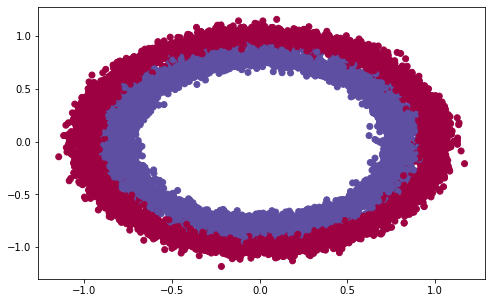

In [2]:
# load data
X_train, y_train = make_circles(n_samples=10000, noise=.05)
X_test, y_test = make_circles(n_samples=100, noise=.05)

# visualize data
plt.subplots(figsize=(8, 5))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral)
plt.show()

# Zero initialization

In [3]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(5, activation="tanh", input_shape=(X_train.shape[1],), kernel_initializer="zeros"),
                             tf.keras.layers.Dense(10, activation="tanh"),
                             tf.keras.layers.Dense(2, activation="tanh"),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss="mse",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=100, validation_data=[X_test, y_test])

Epoch 1/100
313/313 [==============================] - 1s 2ms/step - loss: 0.2501 - accuracy: 0.4966 - val_loss: 0.2500 - val_accuracy: 0.5000
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 0.2500 - accuracy: 0.5108 - val_loss: 0.2503 - val_accuracy: 0.5000
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 0.2502 - accuracy: 0.4864 - val_loss: 0.2500 - val_accuracy: 0.4800
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 0.2502 - accuracy: 0.4804 - val_loss: 0.2500 - val_accuracy: 0.5000
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 0.2501 - accuracy: 0.4999 - val_loss: 0.2500 - val_accuracy: 0.4300
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 0.2501 - accuracy: 0.4997 - val_loss: 0.2500 - val_accuracy: 0.5000
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 0.2501 - accuracy: 0.4880 - val_loss: 0.2500 - val_accuracy: 0.5000

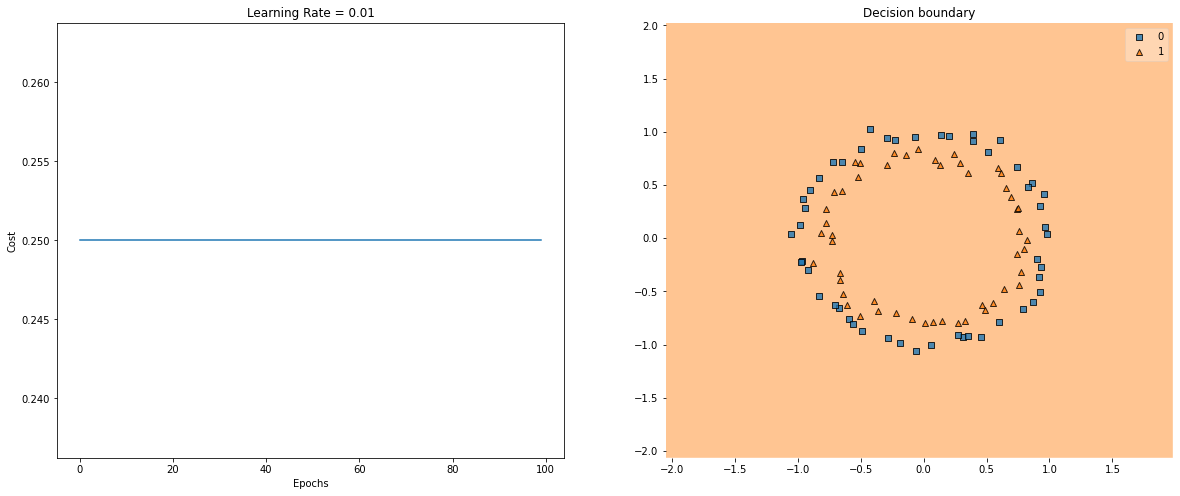

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax[0].plot([round(num, 3) for num in history.history["loss"]])
ax[0].set_title("Learning Rate = 0.01")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Cost")
ax[1] = plot_decision_regions(X_test, y_test, clf=model)
ax[1].set_title("Decision boundary")
plt.show()

# Random Initialization

In [20]:
def random_normal_init(shape, dtype=None): 
  return tf.random.normal(shape) * 10

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(5, activation="tanh", input_shape=(X_train.shape[1],), kernel_initializer=random_normal_init),
                             tf.keras.layers.Dense(10, activation="tanh"),
                             tf.keras.layers.Dense(2, activation="tanh"),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss="mse",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=100, validation_data=[X_test, y_test])

Epoch 1/100
313/313 [==============================] - 1s 2ms/step - loss: 0.2536 - accuracy: 0.4998 - val_loss: 0.2523 - val_accuracy: 0.5200
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 0.2514 - accuracy: 0.4990 - val_loss: 0.2509 - val_accuracy: 0.4900
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 0.2506 - accuracy: 0.4946 - val_loss: 0.2504 - val_accuracy: 0.4900
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 0.2503 - accuracy: 0.4991 - val_loss: 0.2503 - val_accuracy: 0.5000
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 0.2502 - accuracy: 0.4932 - val_loss: 0.2502 - val_accuracy: 0.5000
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 0.2501 - accuracy: 0.4944 - val_loss: 0.2501 - val_accuracy: 0.5100
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 0.2501 - accuracy: 0.4899 - val_loss: 0.2501 - val_accuracy: 0.5000

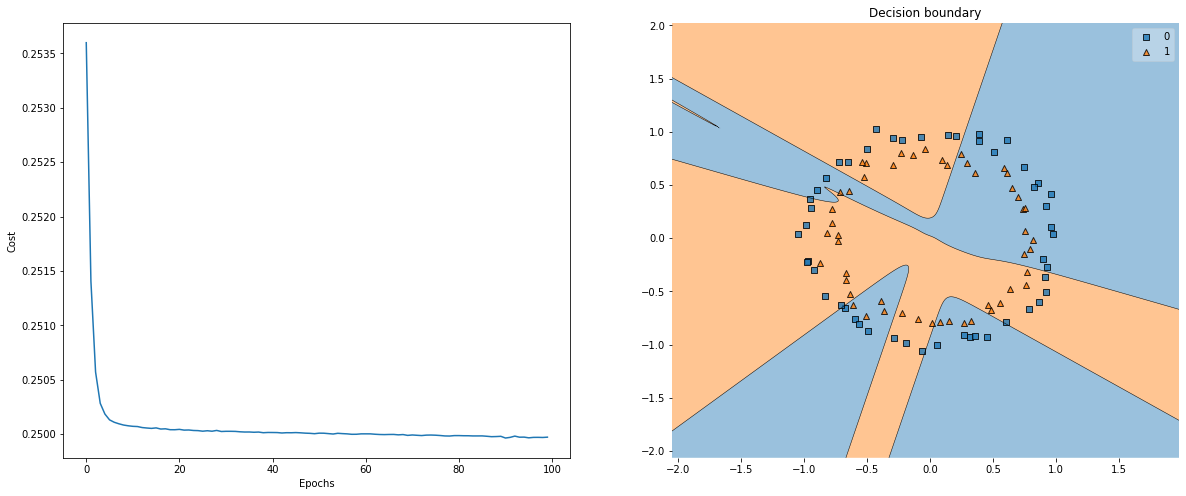

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax[0].plot(history.history["loss"])
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Cost")
ax[1] = plot_decision_regions(X_test, y_test, clf=model)
ax[1].set_title("Decision boundary")
plt.show()

# Xavier Initialization

In [7]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(5, activation="tanh", input_shape=(X_train.shape[1],), kernel_initializer="glorot_uniform"),
                             tf.keras.layers.Dense(10, activation="tanh"),
                             tf.keras.layers.Dense(2, activation="tanh"),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss="mse",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=100, validation_data=[X_test, y_test])

Epoch 1/100
313/313 [==============================] - 1s 3ms/step - loss: 0.2504 - accuracy: 0.5012 - val_loss: 0.2502 - val_accuracy: 0.5100
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 0.2500 - accuracy: 0.5161 - val_loss: 0.2499 - val_accuracy: 0.5300
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 0.2498 - accuracy: 0.5223 - val_loss: 0.2497 - val_accuracy: 0.5300
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 0.2495 - accuracy: 0.5361 - val_loss: 0.2494 - val_accuracy: 0.5500
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 0.2493 - accuracy: 0.5473 - val_loss: 0.2492 - val_accuracy: 0.5600
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 0.2491 - accuracy: 0.5842 - val_loss: 0.2490 - val_accuracy: 0.5600
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 0.2489 - accuracy: 0.5785 - val_loss: 0.2489 - val_accuracy: 0.6200

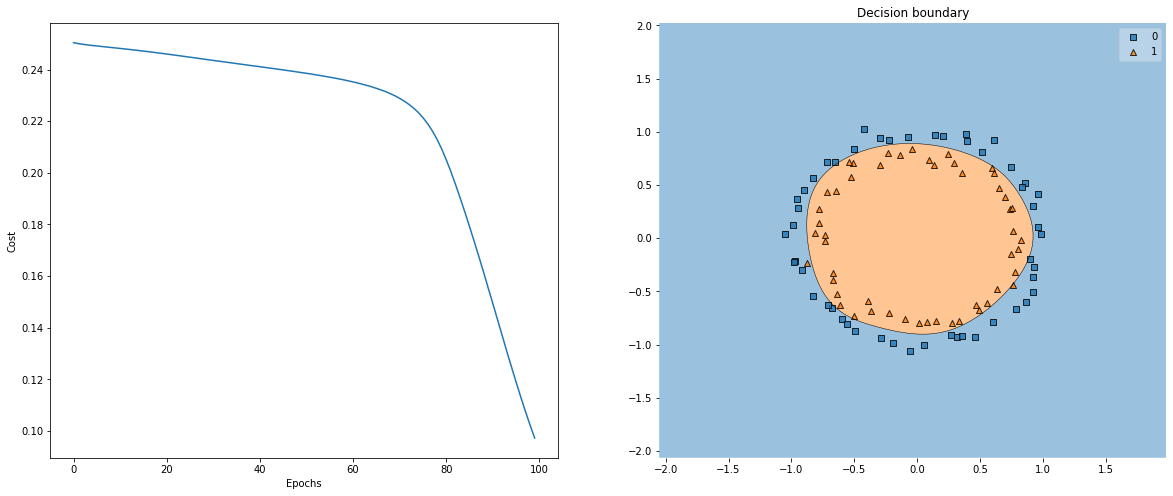

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax[0].plot(history.history["loss"])
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Cost")
ax[1] = plot_decision_regions(X_test, y_test, clf=model)
ax[1].set_title("Decision boundary")
plt.show()


# He Initialization

In [9]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(5, activation="relu", input_shape=(X_train.shape[1],), kernel_initializer="he_uniform"),
                             tf.keras.layers.Dense(10, activation="relu"),
                             tf.keras.layers.Dense(2, activation="relu"),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss="mse",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=100, validation_data=[X_test, y_test])

Epoch 1/100
313/313 [==============================] - 1s 3ms/step - loss: 0.2519 - accuracy: 0.4998 - val_loss: 0.2514 - val_accuracy: 0.4900
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 0.2514 - accuracy: 0.4985 - val_loss: 0.2510 - val_accuracy: 0.5100
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 0.2510 - accuracy: 0.4974 - val_loss: 0.2507 - val_accuracy: 0.4900
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 0.2507 - accuracy: 0.4951 - val_loss: 0.2504 - val_accuracy: 0.4900
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 0.2505 - accuracy: 0.4955 - val_loss: 0.2502 - val_accuracy: 0.5000
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 0.2502 - accuracy: 0.4969 - val_loss: 0.2499 - val_accuracy: 0.5100
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 0.2500 - accuracy: 0.5000 - val_loss: 0.2497 - val_accuracy: 0.5000

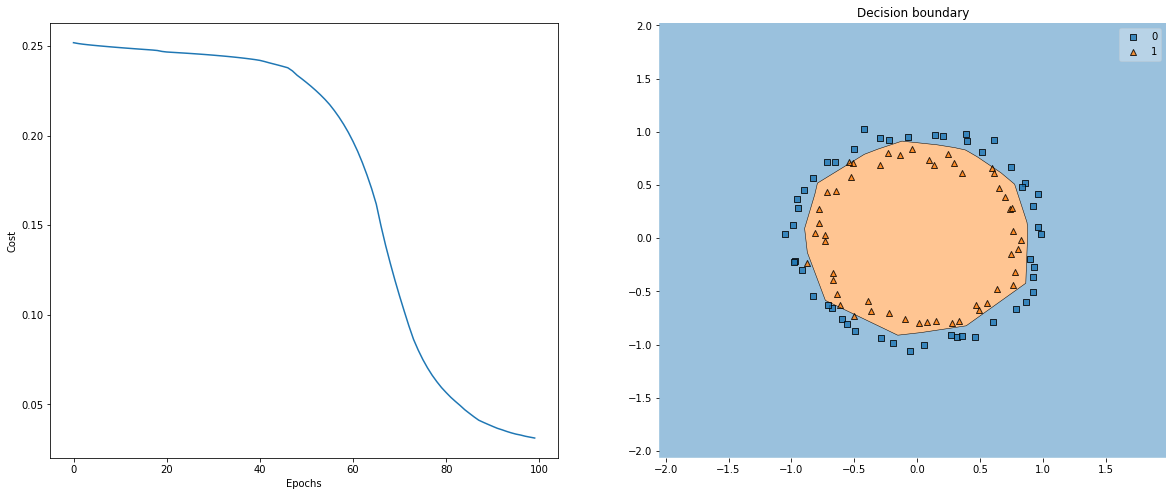

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax[0].plot(history.history["loss"])
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Cost")
ax[1] = plot_decision_regions(X_test, y_test, clf=model)
ax[1].set_title("Decision boundary")
plt.show()